In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\ss\Desktop\bank-marketing.csv')

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
df.shape

(45211, 19)

So, we have 45211 records with 19 columns

In [33]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

response column is our target variable and others are feature columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [35]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


2 . Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [37]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64



As we can see there are 36,954 records having pvalue -1. this is hurting the overall mean.

So, i did a quick search on UCI machine Learning repo site to check what does the pdays actually means:
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
here 999 is replace by -1

So, if pdays = -1, it indicates that this person was not previosly contacted so, we will drop these records because we want to study on people who was involved in the campaign



In [7]:
df=df.drop(df[df.pdays==-1].index)


In [8]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [42]:
df.shape

(8257, 19)

3. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [9]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Now that we have limit ourselves to the relevant values only the mean and median looks bette.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


4. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [13]:
df.groupby(['education'])['balance'].agg(np.median)

education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

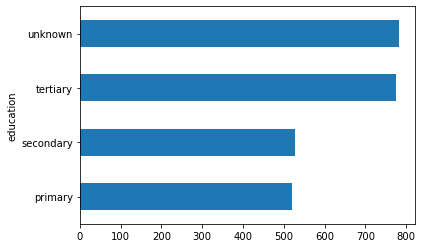

In [16]:
df.groupby(['education'])['balance'].agg(np.median).plot(kind='barh');

So unkonown group has the highest median, and then teriary is scound highest

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

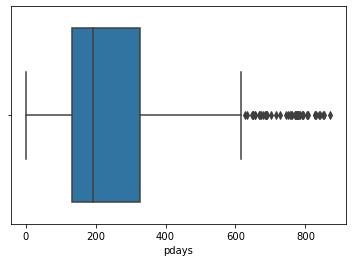

In [17]:
sns.boxplot(df.pdays)



so our median lies at 200, and there are some outliers after 600.


In [5]:
df = df.replace({'response': {"yes": 1,'no':0}})

In [6]:
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

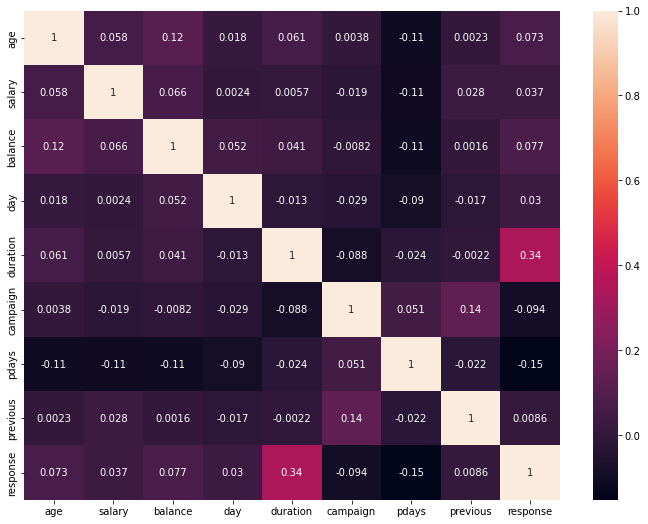

In [22]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True);

In [25]:
import warnings
warnings.filterwarnings("ignore")

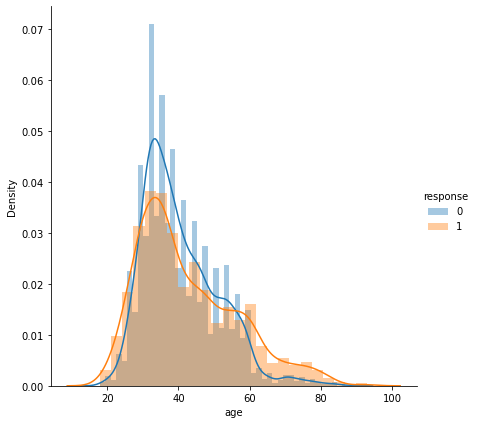

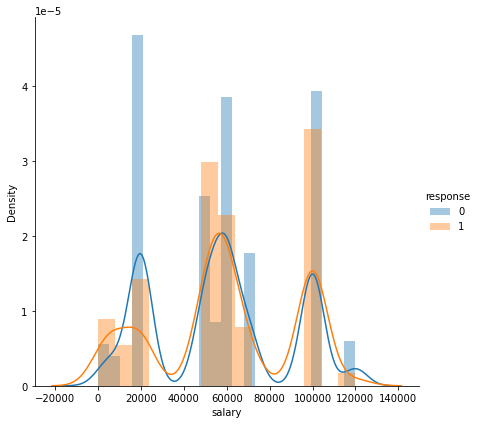

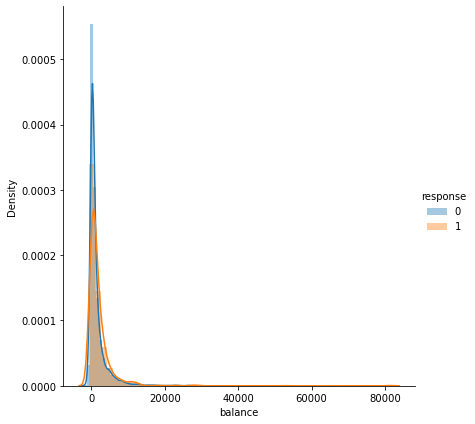

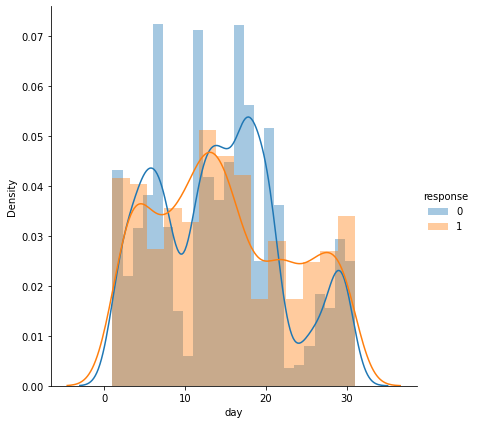

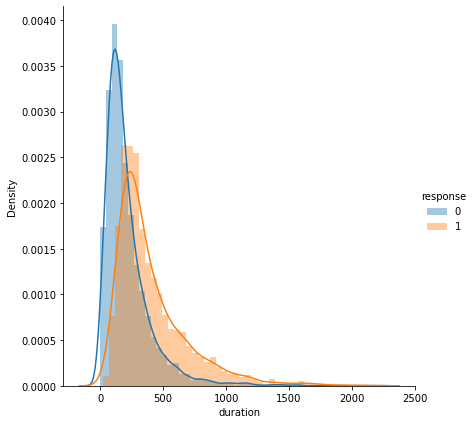

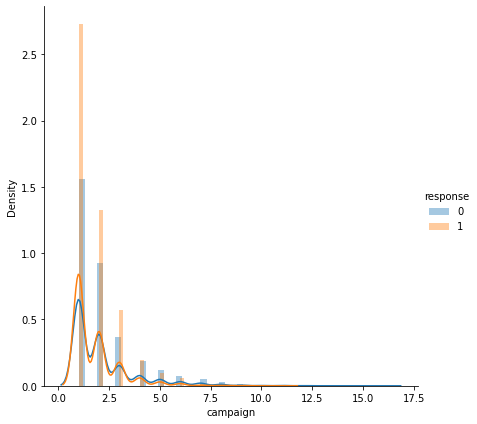

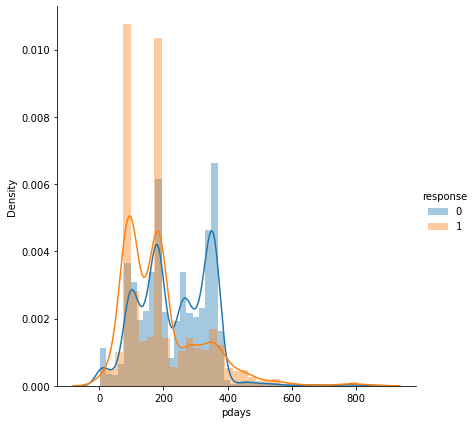

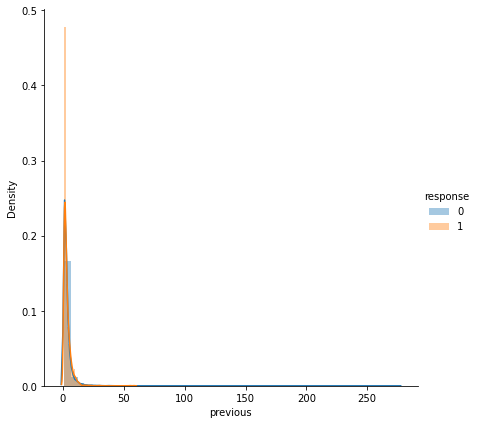

In [26]:
for col in numerical_cols:
    if col != 'response':
        sns.FacetGrid(df, hue='response', height=6).map(sns.distplot, col).add_legend()

Box Plots

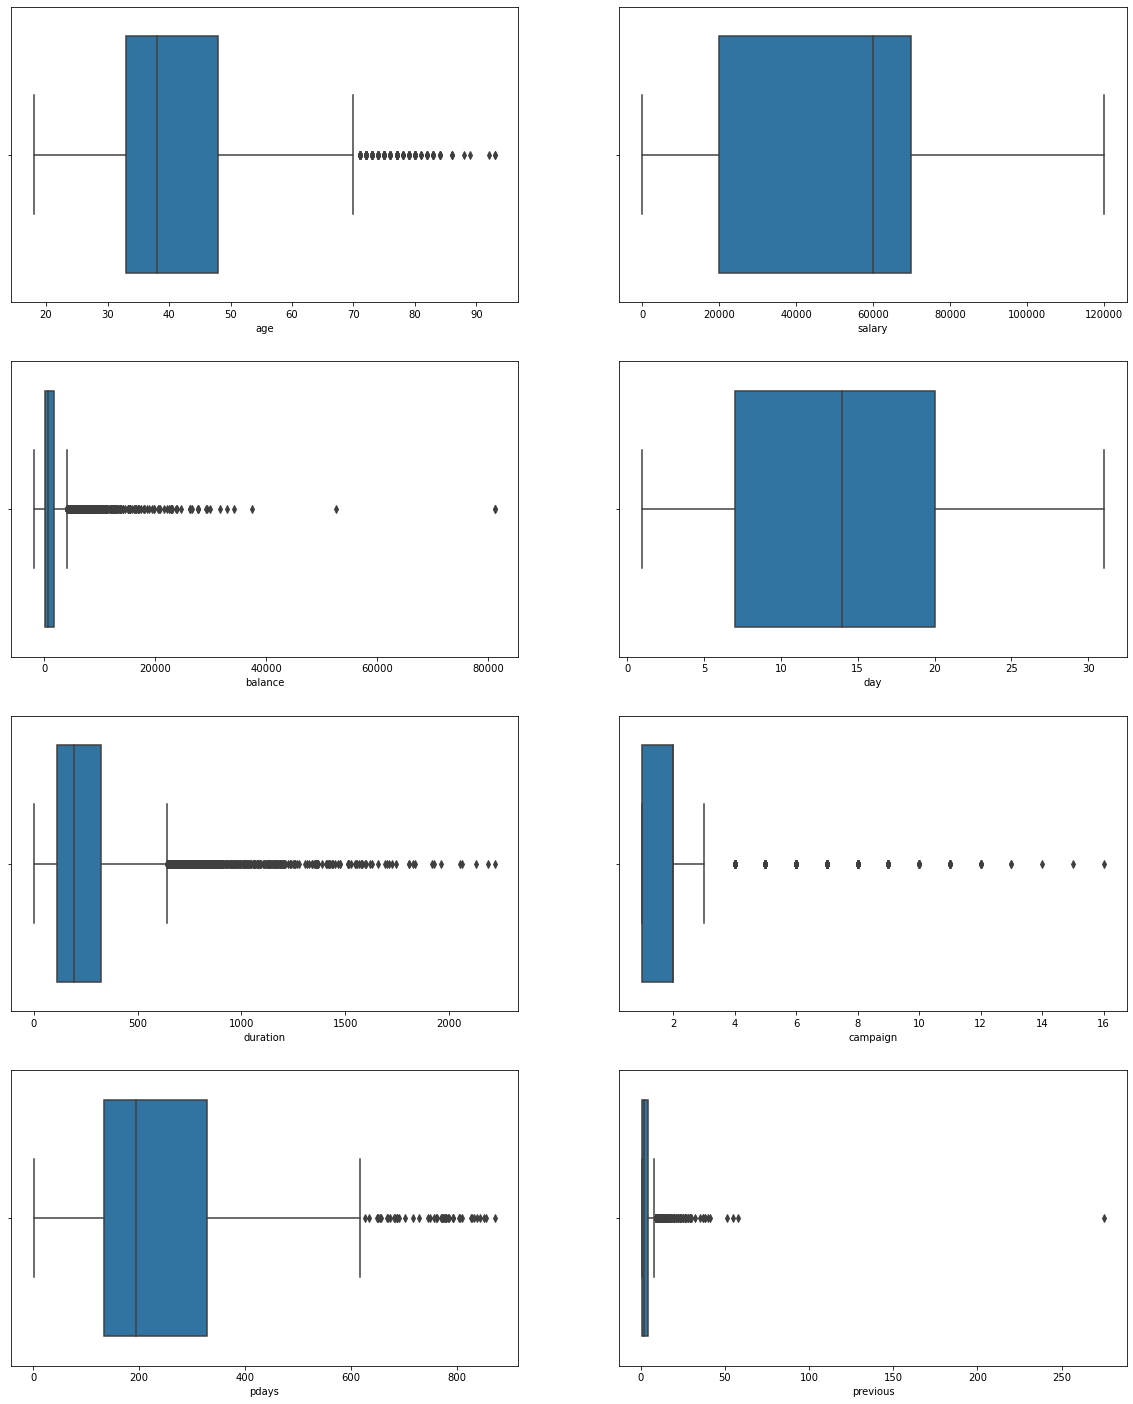

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != 'response':    
        sns.boxplot(col, data=df, ax=ax)

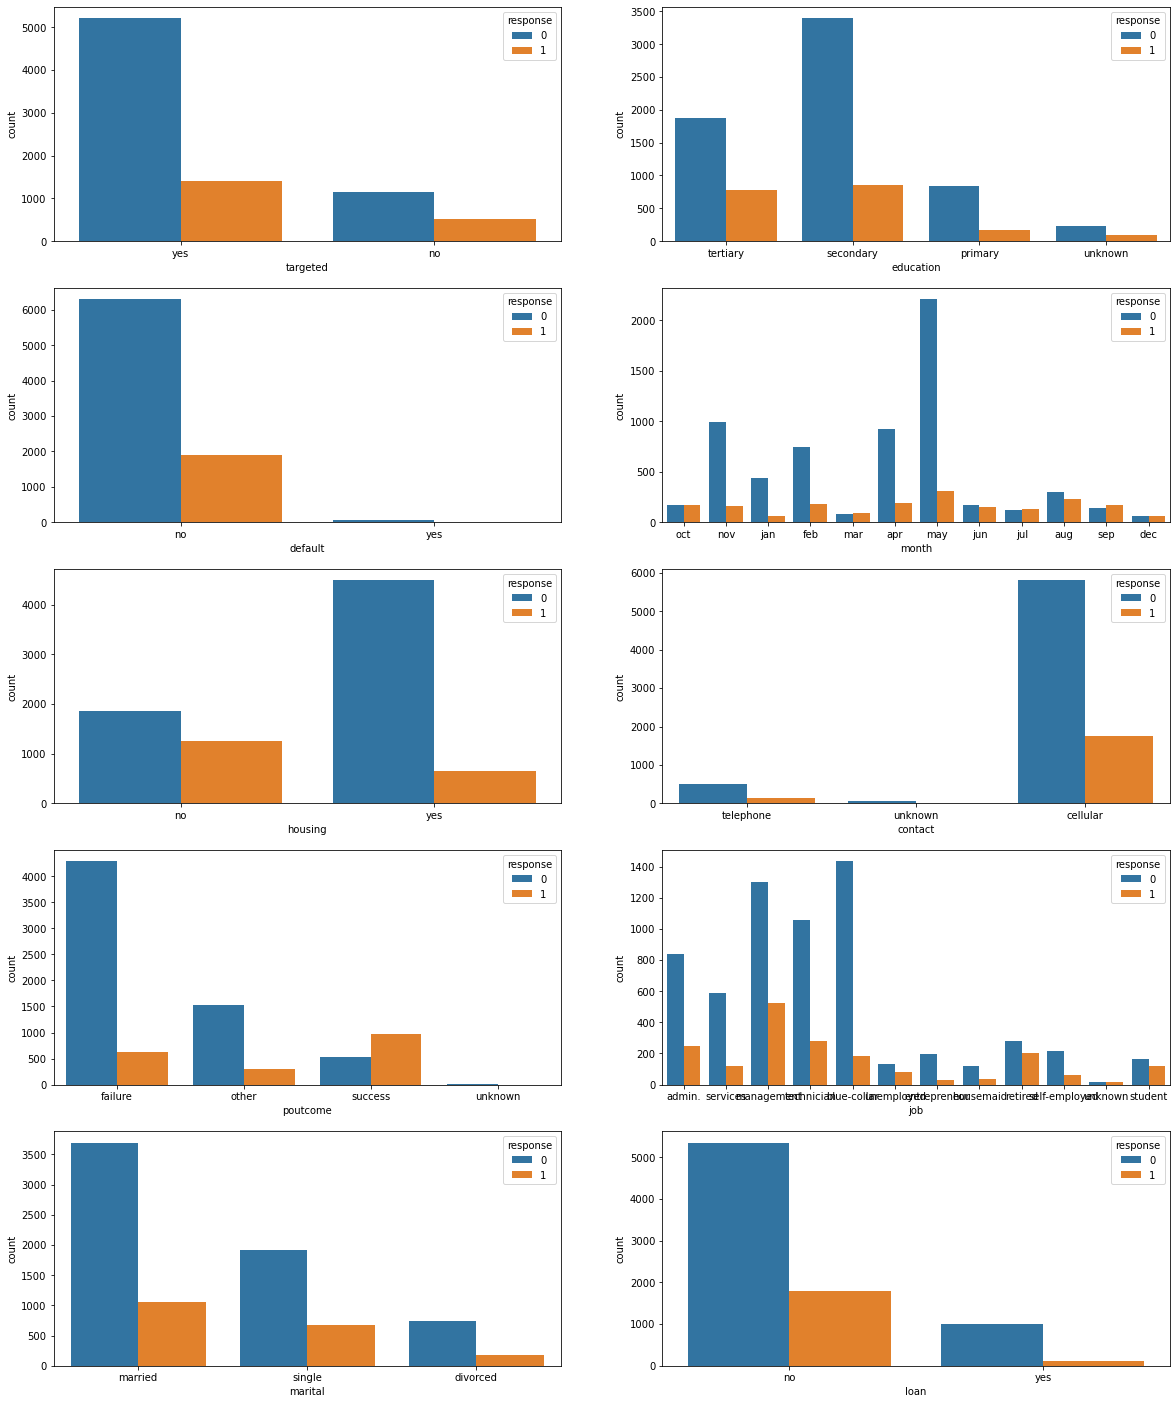

In [32]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(col, data=df,hue=df['response'], ax=ax)



6.Are the features about the previous campaign data useful?

In [33]:
df[numerical_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

From the above, we can see previous collumns is not highly corelated with the response variable

7. Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

yes, if the previous outcome is success there is a high chance to get successful response again, so i will use poutcome in my final model.

if pdays = -1, it indicates that this person was not previosly contacted so, i have dropped these records because we want to study on people who was involved in the campaign

# Data Preprocessing

Dropping collumns with unknown values, because those hurts the distributions

In [35]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)



In [36]:
df.job = df.job.str.replace('admin.', 'admin') 



Convert Categorical Features into Numerical


In [37]:
df_final = df.copy(deep=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
df_final[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [40]:
df_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


# Train-Test Split

In [42]:
y = df_final.pop('response')
X = df_final

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
X_train.shape, y_train.shape

((5704, 18), (5704,))

# Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
sc.fit(X_train[numerical_cols[:-1]]) 
#Last collumn was response, but we no more have it in X_Train so -1 indicates exclusion of that

StandardScaler()

In [50]:
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
40491,1.049063,0,-0.250633,2,1,1,0,0.120390,0,0,1,-0.924492,5,-0.763877,-0.053701,-1.328660,0.163412,0
43777,0.961920,0,-0.250633,2,1,1,0,-0.265456,1,0,0,1.224110,8,1.884625,-0.686580,1.395901,1.171091,0
32747,0.526205,0,-0.250633,2,0,1,0,-0.278923,0,0,0,0.339392,0,-0.802510,-0.686580,-0.672247,-0.441195,0
44680,-1.216658,6,0.065422,2,2,0,0,-0.317445,0,0,1,-1.430045,11,1.214987,4.376450,2.178200,-0.239659,0
32910,0.177632,4,1.329641,1,2,1,0,-0.438022,1,0,0,0.339392,0,-0.562127,1.212056,1.027231,-0.441195,1


In [53]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
25359,-3.880557,0,-1.830965,1,1,1,0,-0.492984,1,1,0,-2.030432,9,-1.120643,-2.176026,-2.021101,-0.781999,0
36458,-3.876586,0,-1.830965,2,1,1,0,-0.492984,1,0,1,-2.044565,8,-1.120672,-1.922536,-2.020986,-0.773813,1
35041,-3.889821,8,-1.830965,2,1,1,0,-0.492984,1,0,1,-2.054659,8,-1.120672,-1.669045,-2.020970,-0.790184,0
32655,-3.883204,9,-1.830965,1,1,1,0,-0.492984,1,0,0,-2.032451,0,-1.120604,-2.176026,-2.021038,-0.773813,0
35572,-3.879233,0,-1.830965,0,1,1,0,-0.492984,1,0,0,-2.052640,8,-1.120655,-1.922536,-2.020969,-0.781999,0


# Predictive model 1: Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [55]:
clf = LogisticRegression()

In [56]:
clf.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = clf.predict(X_test)

In [58]:
def show_report(clf, y_true, y_pred): 
    print('Accuracy: ',accuracy_score(y_true, y_pred))
    print('================================')
    print('Precision: ',precision_score(y_true, y_pred))
    print('================================')
    print('Recall: ',recall_score(y_true, y_pred))
    print('================================')
    print('\nClassification Report\n')
    print(classification_report(y_true, y_pred))
    print('================================')
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_true, y_pred))
    print('================================')
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [59]:
show_report(clf, y_pred, y_test)

Accuracy:  0.7676891615541922
Precision:  0.03595890410958904
Recall:  0.8076923076923077

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      2419
           1       0.04      0.81      0.07        26

    accuracy                           0.77      2445
   macro avg       0.52      0.79      0.47      2445
weighted avg       0.99      0.77      0.86      2445


confusion_matrix

[[1856  563]
 [   5   21]]

cross validation: [0.79509202 0.72331288 0.77791411 0.77546012 0.73296501]


# RFE Model

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 15)

In [61]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

The higher values mean that they were dropped at the early stage and the smaller values mean that they survive till the end and prove themselves fittest for the model. In a nutshell, columns with lower ranks are good for us.

In [62]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
clf.fit(X_train[cols],y_train)
y_pred2 = clf.predict(X_test[cols])

Index(['age', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [63]:
show_report(clf, y_pred2, y_test)

Accuracy:  0.7635991820040899
Precision:  0.0136986301369863
Recall:  0.8

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.87      2435
           1       0.01      0.80      0.03        10

    accuracy                           0.76      2445
   macro avg       0.51      0.78      0.45      2445
weighted avg       0.99      0.76      0.86      2445


confusion_matrix

[[1859  576]
 [   2    8]]

cross validation: [0.79509202 0.72331288 0.77791411 0.77546012 0.73296501]


# VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
4,default,1.01
9,day,1.01
13,previous,1.02
10,duration,1.03
5,balance,1.04
11,campaign,1.04
8,contact,1.15
7,loan,1.17
0,age,1.20
1,salary,1.21


# P-value

In [68]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [69]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     173.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:53:17   Log-Likelihood:                -2047.9
No. Observations:                5704   AIC:                             4128.
Df Residuals:                    5688   BIC:                             4234.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1922      0.017     11.184      0.0

In [70]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
6,housing,0.000
7,loan,0.000
10,duration,0.000
11,campaign,0.000
14,poutcome,0.000
3,education,0.001
5,balance,0.025
8,contact,0.059
2,marital,0.109
0,age,0.121


In [71]:
final_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['default', 'previous', 'pdays', 'day', 'salary', 'age', 'marital', 'contact']

# Using selected features

In [72]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [73]:
show_report(clf, y_pred3, y_test)

Accuracy:  0.7611451942740286
Precision:  0.0
Recall:  0.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2445
           1       0.00      0.00      0.00         0

    accuracy                           0.76      2445
   macro avg       0.50      0.38      0.43      2445
weighted avg       1.00      0.76      0.86      2445


confusion_matrix

[[1861  584]
 [   0    0]]

cross validation: [0.79509202 0.72331288 0.77791411 0.77546012 0.73296501]


So these are the most imposrtant features

# Predictive model 2: Random Forest

Using all features

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=48,max_depth=5)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=48)

In [77]:
y_pred_rf = clf2.predict(X_test)

In [78]:
show_report(clf2, y_pred_rf, y_test)

Accuracy:  0.7611451942740286
Precision:  0.0
Recall:  0.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2445
           1       0.00      0.00      0.00         0

    accuracy                           0.76      2445
   macro avg       0.50      0.38      0.43      2445
weighted avg       1.00      0.76      0.86      2445


confusion_matrix

[[1861  584]
 [   0    0]]

cross validation: [0.78527607 0.8398773  0.85214724 0.86134969 0.58747698]


['poutcome', 'duration', 'housing', 'pdays', 'month']


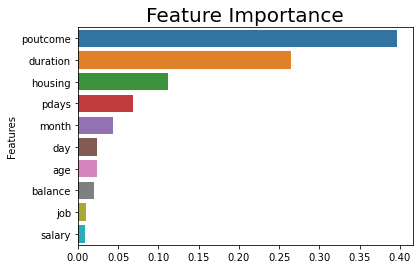

In [79]:
importances=clf2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

In [80]:
clf2.fit(X_train[selected_features], y_train)
y_pred_rf2 = clf2.predict(X_test[selected_features])

In [81]:
show_report(clf2, y_pred_rf2, y_test)

Accuracy:  0.7611451942740286
Precision:  0.0
Recall:  0.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2445
           1       0.00      0.00      0.00         0

    accuracy                           0.76      2445
   macro avg       0.50      0.38      0.43      2445
weighted avg       1.00      0.76      0.86      2445


confusion_matrix

[[1861  584]
 [   0    0]]

cross validation: [0.77607362 0.79693252 0.85214724 0.86809816 0.59300184]


# Compare the performance of the Random Forest and the logistic model

In [83]:
print('Logistic Regression\n')
show_report(clf , y_pred, y_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(clf2, y_pred_rf2, y_test)

Logistic Regression

Accuracy:  0.7676891615541922
Precision:  0.03595890410958904
Recall:  0.8076923076923077

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      2419
           1       0.04      0.81      0.07        26

    accuracy                           0.77      2445
   macro avg       0.52      0.79      0.47      2445
weighted avg       0.99      0.77      0.86      2445


confusion_matrix

[[1856  563]
 [   5   21]]

cross validation: [0.79509202 0.72331288 0.77791411 0.77546012 0.73296501]



Random Forest Classifier

Accuracy:  0.7611451942740286
Precision:  0.0
Recall:  0.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2445
           1       0.00      0.00      0.00         0

    accuracy                           0.76      2445
   macro avg       0.50      0.38      0.43      2445
weighted avg       1.00      0.7